## Audit Task


In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns


In [2]:
audit = pd.read_csv("data.csv")

In [3]:
audit.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [4]:
audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   773 non-null    float64
 1   LOCATION_ID    773 non-null    int64  
 2   PARA_A         773 non-null    float64
 3   SCORE_A        773 non-null    int64  
 4   PARA_B         773 non-null    float64
 5   SCORE_B        773 non-null    int64  
 6   TOTAL          773 non-null    float64
 7   numbers        773 non-null    float64
 8   Marks          773 non-null    int64  
 9   Money_Value    772 non-null    float64
 10  MONEY_Marks    773 non-null    int64  
 11  District       773 non-null    int64  
 12  Loss           773 non-null    int64  
 13  LOSS_SCORE     773 non-null    int64  
 14  History        773 non-null    int64  
 15  History_score  773 non-null    int64  
 16  Score          773 non-null    float64
 17  Risk           773 non-null    int64  
dtypes: float64

# Preprocessing the dataset

In [5]:
# check for null values
audit.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [6]:
audit['Risk'].value_counts()


1    486
0    287
Name: Risk, dtype: int64

## FIll the missing data

In [7]:
median =  audit["Money_Value"].median

In [8]:
audit["Money_Value"].fillna(median)

0       3.38
1       0.94
2        0.0
3      11.75
4        0.0
       ...  
768      0.0
769      0.0
770      0.0
771      0.0
772     0.32
Name: Money_Value, Length: 773, dtype: object

In [9]:
audit.describe() ###before missing

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,772.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,20.255149,14.856404,2.457983,3.518758,10.841903,3.135834,13.268062,5.067917,2.238034,14.191093,2.913325,2.507115,0.029754,2.062096,0.104787,2.168176,2.705304,0.628719
std,24.339709,9.891317,5.688509,1.741366,50.176308,1.699869,51.406241,0.264928,0.804941,66.730436,1.599544,1.230659,0.184628,0.375788,0.532022,0.681108,0.859470,0.483460
min,1.850000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,8.000000,0.210000,2.000000,0.000000,2.000000,0.540000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,13.000000,0.880000,2.000000,0.410000,2.000000,1.390000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,19.000000,2.480000,6.000000,4.160000,4.000000,7.760000,5.000000,2.000000,5.630000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.400000,1.000000
max,59.850000,44.000000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(audit)

SimpleImputer(strategy='median')

In [11]:
imputer.statistics_

array([ 3.89, 13.  ,  0.88,  2.  ,  0.41,  2.  ,  1.39,  5.  ,  2.  ,
        0.09,  2.  ,  2.  ,  0.  ,  2.  ,  0.  ,  2.  ,  2.4 ,  1.  ])

In [12]:
X = imputer.transform(audit)

In [13]:
audit = pd.DataFrame(X, columns=audit.columns)

In [14]:
audit.describe #after missing data

<bound method NDFrame.describe of      Sector_score  LOCATION_ID  PARA_A  SCORE_A  PARA_B  SCORE_B  TOTAL  \
0            3.89         23.0    4.18      6.0    2.50      2.0   6.68   
1            3.89          6.0    0.00      2.0    4.83      2.0   4.83   
2            3.89          6.0    0.51      2.0    0.23      2.0   0.74   
3            3.89          6.0    0.00      2.0   10.80      6.0  10.80   
4            3.89          6.0    0.00      2.0    0.08      2.0   0.08   
..            ...          ...     ...      ...     ...      ...    ...   
768         55.57          9.0    0.49      2.0    0.40      2.0   0.89   
769         55.57         16.0    0.47      2.0    0.37      2.0   0.84   
770         55.57         14.0    0.24      2.0    0.04      2.0   0.28   
771         55.57         18.0    0.20      2.0    0.00      2.0   0.20   
772         55.57         15.0    0.00      2.0    0.00      2.0   0.00   

     numbers  Marks  Money_Value  MONEY_Marks  District  Loss  LO

# Coorelation Matrix

In [15]:
audit.corr()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
Sector_score,1.000000,-0.059436,-0.218142,-0.428821,-0.133454,-0.221336,-0.154227,-0.152769,-0.171478,-0.118560,-0.321118,-0.109553,-0.083716,-0.087329,-0.115503,-0.137783,-0.340517,-0.379999
LOCATION_ID,-0.059436,1.000000,-0.004230,0.083520,0.007778,0.128354,0.007929,0.008175,-0.015875,-0.065037,0.109984,-0.107445,0.007308,-0.002477,-0.080336,-0.052554,0.090917,0.048700
PARA_A,-0.218142,-0.004230,1.000000,0.496336,0.161698,0.358031,0.266797,0.133484,0.140300,0.449230,0.285458,0.127312,0.045185,0.043494,0.118047,0.172358,0.426194,0.291669
SCORE_A,-0.428821,0.083520,0.496336,1.000000,0.249098,0.571737,0.297179,0.242214,0.274047,0.205883,0.477955,0.087431,0.092943,0.093232,0.177542,0.264910,0.719718,0.670660
PARA_B,-0.133454,0.007778,0.161698,0.249098,1.000000,0.347341,0.994101,0.209687,0.230663,0.124933,0.314297,0.082634,0.044685,0.042419,0.203451,0.316400,0.397022,0.162267
SCORE_B,-0.221336,0.128354,0.358031,0.571737,0.347341,1.000000,0.379064,0.277188,0.313357,0.204915,0.566963,-0.005726,0.098543,0.092224,0.200520,0.309170,0.901107,0.513811
TOTAL,-0.154227,0.007929,0.266797,0.297179,0.994101,0.379064,1.000000,0.217448,0.238020,0.168561,0.337169,0.092985,0.048716,0.046319,0.210603,0.326236,0.433653,0.190184
numbers,-0.152769,0.008175,0.133484,0.242214,0.209687,0.277188,0.217448,1.000000,0.908115,0.186078,0.446438,0.124658,-0.001644,0.035650,0.202173,0.209405,0.502731,0.197131
Marks,-0.171478,-0.015875,0.140300,0.274047,0.230663,0.313357,0.238020,0.908115,1.000000,0.220229,0.507001,0.149972,0.004578,0.036718,0.226007,0.248212,0.565870,0.227394
Money_Value,-0.118560,-0.065037,0.449230,0.205883,0.124933,0.204915,0.168561,0.186078,0.220229,1.000000,0.391257,0.028021,0.024449,0.031697,0.079984,0.112068,0.291646,0.160388


In [16]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'Sector_score'}>,
        <AxesSubplot:title={'center':'LOCATION_ID'}>,
        <AxesSubplot:title={'center':'PARA_A'}>,
        <AxesSubplot:title={'center':'SCORE_A'}>],
       [<AxesSubplot:title={'center':'PARA_B'}>,
        <AxesSubplot:title={'center':'SCORE_B'}>,
        <AxesSubplot:title={'center':'TOTAL'}>,
        <AxesSubplot:title={'center':'numbers'}>],
       [<AxesSubplot:title={'center':'Marks'}>,
        <AxesSubplot:title={'center':'Money_Value'}>,
        <AxesSubplot:title={'center':'MONEY_Marks'}>,
        <AxesSubplot:title={'center':'District'}>],
       [<AxesSubplot:title={'center':'Loss'}>,
        <AxesSubplot:title={'center':'LOSS_SCORE'}>,
        <AxesSubplot:title={'center':'History'}>,
        <AxesSubplot:title={'center':'History_score'}>],
       [<AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'Risk'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

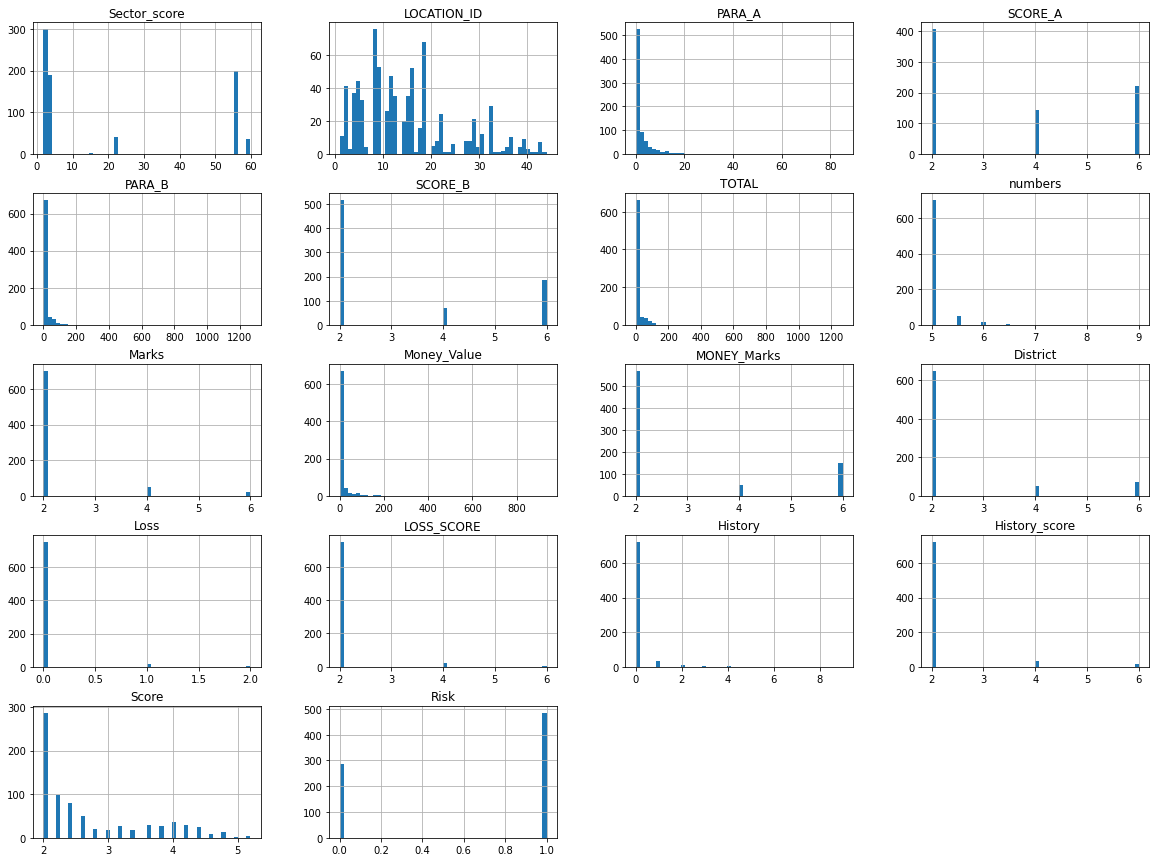

In [17]:

import matplotlib.pyplot as plt
audit.hist(bins=50, figsize=(20, 15))

<AxesSubplot:>

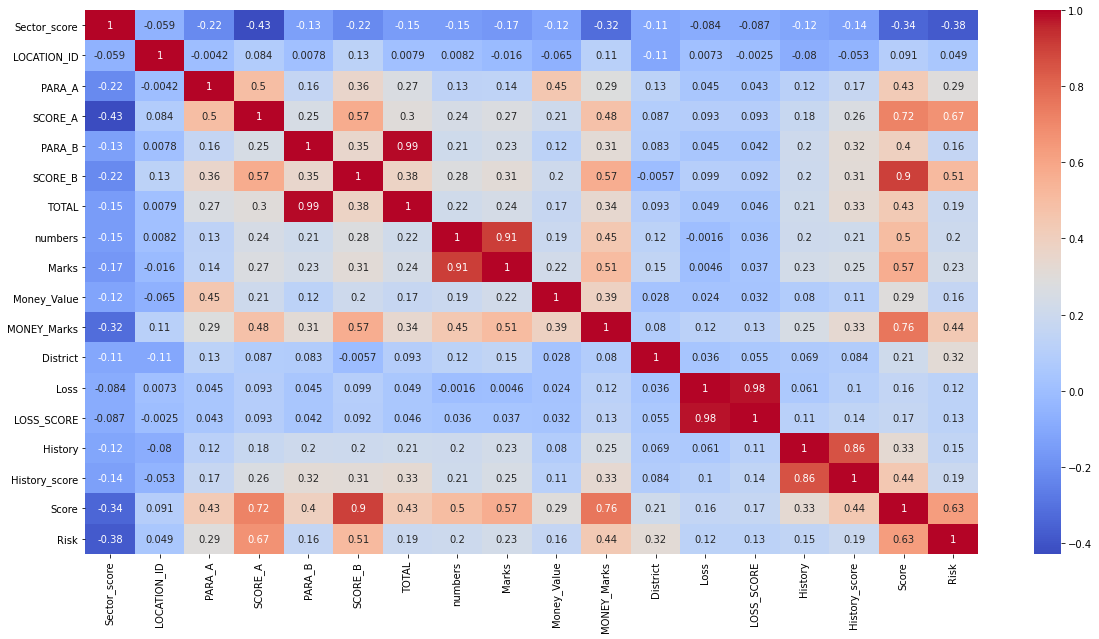

In [18]:
corr = audit.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Level Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
audit['Risk'] = le.fit_transform(audit['Risk'])
audit.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23.0,4.18,6.0,2.50,2.0,6.68,5.0,2.0,3.38,2.0,2.0,0.0,2.0,0.0,2.0,2.4,1
1,3.89,6.0,0.00,2.0,4.83,2.0,4.83,5.0,2.0,0.94,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0
2,3.89,6.0,0.51,2.0,0.23,2.0,0.74,5.0,2.0,0.00,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0
3,3.89,6.0,0.00,2.0,10.80,6.0,10.80,6.0,6.0,11.75,6.0,2.0,0.0,2.0,0.0,2.0,4.4,1
4,3.89,6.0,0.00,2.0,0.08,2.0,0.08,5.0,2.0,0.00,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0


## Train and split Data

In [21]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = audit.drop(columns=['Risk'])
Y = audit['Risk']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

## LogisticRegression

In [22]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(x_train, y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  99.13793103448276


## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [26]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  92.24137931034483


##  Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [29]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0



ROC curver

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
text_clf=Pipeline([('lr_model',DecisionTreeClassifier())])
text_clf.fit(x_train,y_train)

Pipeline(steps=[('lr_model', DecisionTreeClassifier())])

In [33]:
predictions=text_clf.predict(x_test)

In [34]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       134

    accuracy                           1.00       232
   macro avg       1.00      1.00      1.00       232
weighted avg       1.00      1.00      1.00       232



In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

In [37]:

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)

AUC: 1.000


In [38]:
lr_probs = model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]

In [39]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

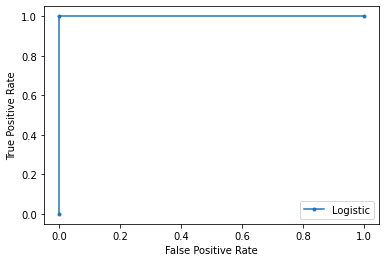

In [40]:
from matplotlib import pyplot
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()